In [111]:
import election_analysis as ea
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt

In [4]:
attribs = [
            'GOPChange',
            'GOP2016',
            'GOP2012',

            #'AL_GOP2017',

            #'Turnout2012',

            'Population2016',
            'Population2012',
            'Population2009',
            'Population1980',
            'PopulationDensity2016',

            'White2015',
            'Black2015',
            'Hispanic2015',
            'Asian2015',
            'Indian2015',
            'Youth2015',
            'White2009',
            'Black2009',
            'Hispanic2009',
            'Asian2009',
            'Indian2009',
            'Youth2009',
            'Youth2012',

            'Unemployment2016',
            'Unemployment2011',
            'Unemployment2007',

            'MedianAge',
            'Bachelors',
            'CommuteTime',
            'FoodStamps',
            'Homeownership',
            'IncomeInequality',

            'Businesses2016',
            'Businesses2009',

            'RentBurdened2015',
            'RentBurdened2010',

            'EvangelicalProtestant',
            'MainlineProtestant',
            'BlackProtestant',
            'Catholic',
            'Jewish',
            'Muslim',
            'Mormon',

            'ClimateChange',

            'Corn',
            'Cotton',
            'Soybeans',
            'WinterWheat',
            'MedianIncome',
            'DrugPoisoning'
        ]
analysis = ea.ElectionAnalysis(attribs = attribs, reloadData=True)

/home/christian/.local/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [6]:
import geopandas as gp

In [10]:
df = gp.read_file('cb_2015_us_county_5m/cb_2015_us_county_5m.shp')

In [50]:
df.index = list(map(int,df['GEOID']))

In [51]:
df.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
5089,05,089,00069898,0500000US05089,05089,Marion,06,1546245372,112149491,"POLYGON ((-92.884445 36.490713, -92.873666 36...."
6079,06,079,00277304,0500000US06079,06079,San Luis Obispo,06,8548549787,815580311,"POLYGON ((-121.346362833935 35.7951826441526, ..."
17111,17,111,01784815,0500000US17111,17111,McHenry,06,1562336303,19832927,"POLYGON ((-88.7073777163598 42.4935870483795, ..."
20131,20,131,00485029,0500000US20131,20131,Nemaha,06,1858124408,5208990,"POLYGON ((-96.23920788160289 40.0006909657961,..."
28141,28,141,00695791,0500000US28141,28141,Tishomingo,06,1098939230,52359814,POLYGON ((-88.36353086235189 34.99558961029079...


In [102]:
result=pd.concat([df,analysis.data],axis=1)
result.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,...,Jewish,Muslim,Mormon,ClimateChange,Corn,Cotton,Soybeans,WinterWheat,MedianIncome,DrugPoisoning
1001,01,001,00161526,0500000US01001,01001,Autauga,06,1539589643,25769317,"POLYGON ((-86.91759499999999 32.664169, -86.81...",...,0.0,0.0,0.015026,0.43458,0.000000,0.018926,0.000000,0.0,54366.0,10.1
1003,01,003,00161527,0500000US01003,01003,Baldwin,06,4117584013,1133129224,"POLYGON ((-88.02927199999999 30.222714, -88.02...",...,0.0,0.0,0.005607,0.42224,0.007666,0.012679,0.017200,0.0,49626.0,20.1
1005,01,005,00161528,0500000US01005,01005,Barbour,06,2291820706,50864677,"POLYGON ((-85.74173999999999 31.619403, -85.72...",...,0.0,0.0,0.009651,0.49059,0.004768,0.012184,0.000000,0.0,34971.0,6.1
1007,01,007,00161529,0500000US01007,01007,Bibb,06,1612481559,9287974,"POLYGON ((-87.421936 33.003379, -87.318539 33....",...,0.0,0.0,0.000000,0.41923,0.000000,0.000000,0.000000,0.0,39546.0,14.1
1009,01,009,00161530,0500000US01009,01009,Blount,06,1670041875,15077458,"POLYGON ((-86.96211099999999 33.867691, -86.94...",...,0.0,0.0,0.005077,0.42595,0.000000,0.000000,0.005574,0.0,45567.0,16.1


In [163]:
import cartopy.crs as ccrs

def countyPlot(df, column,cmap='inferno',vmin=None,vmax=None):
    lambertString = '+proj=lcc +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs'
    fig = plt.figure(figsize=[20,10])
    ax = plt.axes([0.0,0.0,1.0,1.0], projection=ccrs.LambertConformal(central_longitude=-96.0, central_latitude=39.0, cutoff=-20), frameon=False)
    ax.set_extent([-120.0,-74., 21.,47.])
    df.to_crs(lambertString).plot(column=column, cmap=cmap,ax=ax, figsize=[20,10])


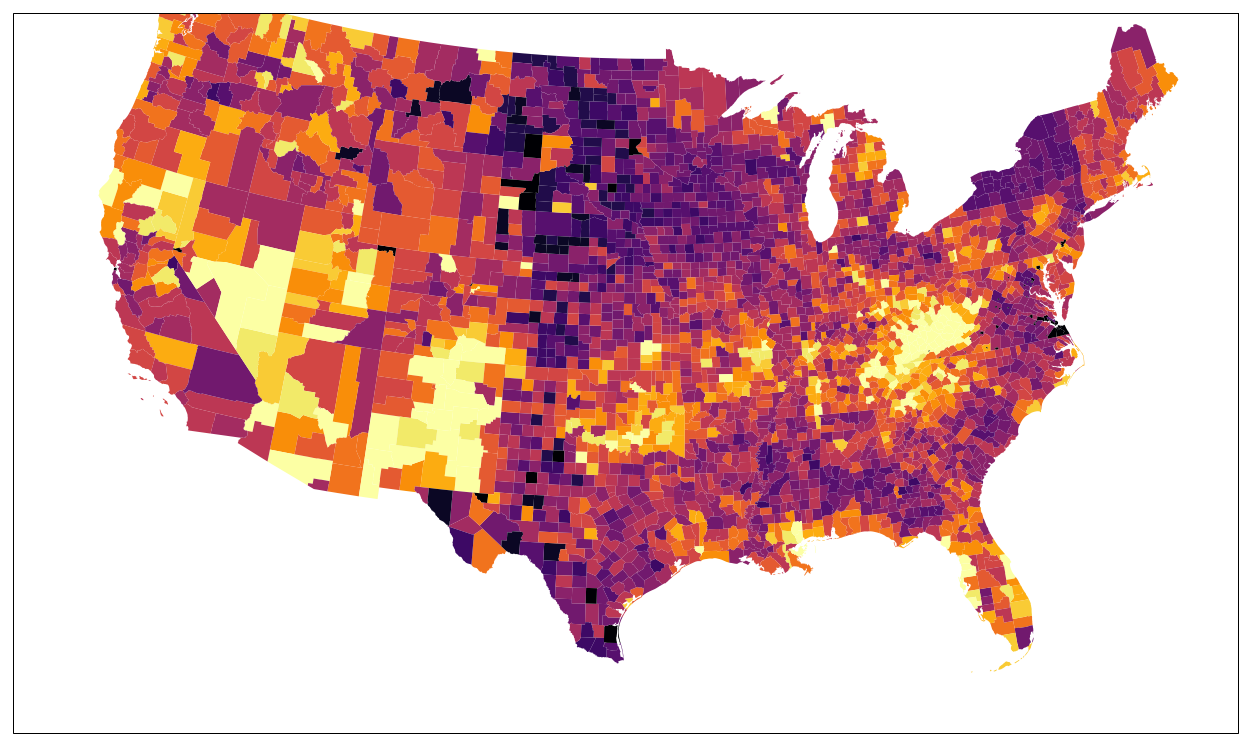

In [164]:
countyPlot(result, 'DrugPoisoning')

In [147]:
df.crs

{'init': 'epsg:4269'}